# Intermediate

## Task 01: Task: Use a multilingual topic model to analyze parallel texts in Old English and Latin.

This code applies topic modeling to parallel texts in Old English and Latin. The goal is to discover common themes across the two languages and analyze how topic distributions differ between them.

Hints:
- Align the texts at the sentence or paragraph level.
- Use a model designed for multilingual data (e.g., polylingual LDA).

**Libraries:**

* **nltk:**
    * `stopwords`: Filters out common words.
    * `tokenize`: Splits text into words (tokens).
    * `stem`: Reduces words to their root form (for English only).
* **gensim:**
    * `corpora`: Creates a dictionary and corpus for topic modeling.
    * `models.ldamulticore`: Implementation of Latent Dirichlet Allocation (LDA).
    * `models.coherencemodel`: Assesses the quality of the topics found.
* **string:**  Handles string manipulations (removing punctuation).
* **numpy:** Performs numerical calculations.
* **matplotlib.pyplot:**  Visualizes results with a bar chart.

**Code Workflow:**

1. **Data Loading and Preprocessing:**
   * Load parallel Old English and Latin texts.
   * The `preprocess` function:
     * Tokenizes text.
     * Converts to lowercase.
     * Removes punctuation and numbers.
     * Removes stop words (English and a custom list for Latin).
     * Lemmatizes words (for English only).

2. **Topic Modeling with Polylingual LDA:**
   * Create separate dictionaries and corpora for Old English and Latin.
   * Merge dictionaries and corpora to create a combined dataset.
   * Train the LDA model to find `num_topics` (set to 5) across both languages.

3. **Topic Analysis and Visualization:**
   * Get topic distributions for each Old English and Latin text.
   * Calculate average topic distributions for each language.
   * Generate a bar chart comparing average topic probabilities between Old English and Latin.
   * Print the top words associated with each topic to reveal their content.
   * Calculate and print the topic coherence score to assess topic quality.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


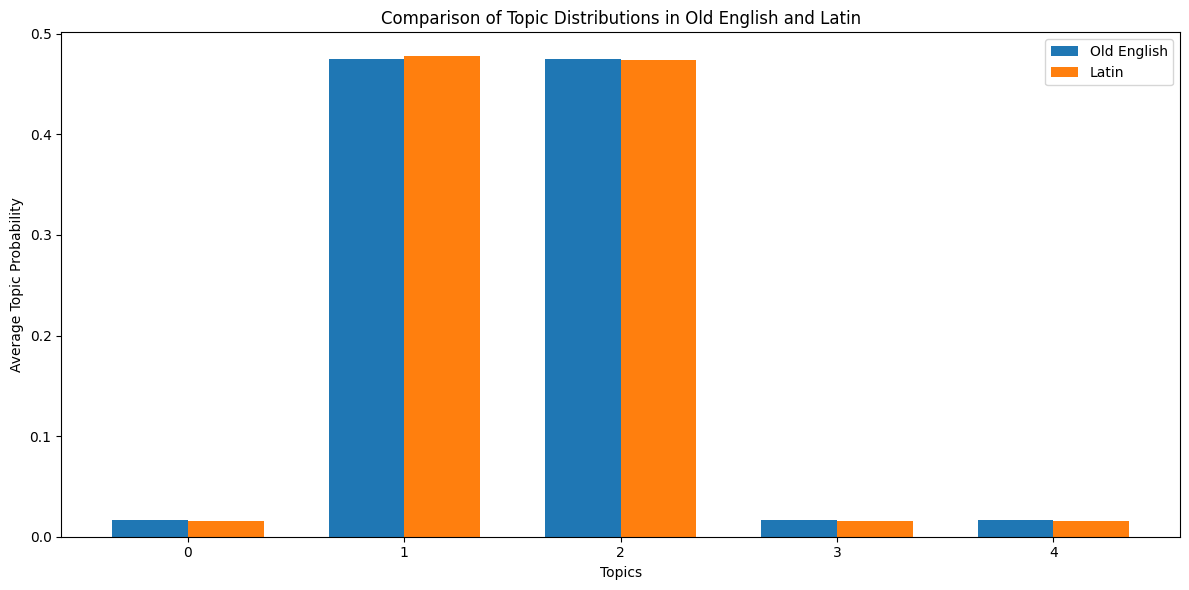

Top words for each topic:
Topic: 0 
Words: 0.023*"scyld" + 0.023*"gefrunon" + 0.023*"þrym" + 0.023*"hwæt" + 0.023*"sceaþena" + 0.023*"gardena" + 0.023*"mægþum" + 0.023*"þreatum" + 0.023*"oft" + 0.023*"scefing"

Topic: 1 
Words: 0.070*"eorlas" + 0.070*"meodosetla" + 0.070*"monegum" + 0.070*"egsode" + 0.070*"oft" + 0.070*"þreatum" + 0.070*"scefing" + 0.070*"ofteah" + 0.070*"mægþum" + 0.070*"sceaþena"

Topic: 2 
Words: 0.072*"ellen" + 0.072*"hu" + 0.072*"æþelingas" + 0.072*"þeodcyninga" + 0.072*"geardagum" + 0.072*"fremedon" + 0.072*"ða" + 0.072*"gardena" + 0.072*"hwæt" + 0.072*"gefrunon"

Topic: 3 
Words: 0.023*"þrym" + 0.023*"scyld" + 0.023*"sceaþena" + 0.023*"fremedon" + 0.023*"þeodcyninga" + 0.023*"scefing" + 0.023*"mægþum" + 0.023*"ofteah" + 0.023*"hwæt" + 0.023*"oft"

Topic: 4 
Words: 0.023*"sceaþena" + 0.023*"þrym" + 0.023*"scyld" + 0.023*"mægþum" + 0.023*"ða" + 0.023*"þreatum" + 0.023*"geardagum" + 0.023*"gardena" + 0.023*"hwæt" + 0.023*"gefrunon"

Topic Coherence: 0.1217318687965

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import gensim
from gensim import corpora
import string
import numpy as np
import matplotlib.pyplot as plt
from gensim.models.ldamulticore import LdaMulticore
from gensim.models.coherencemodel import CoherenceModel

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Sample parallel texts (replace with your actual parallel corpus)
old_english_texts = [
    "Hwæt! We Gardena in geardagum, þeodcyninga, þrym gefrunon, hu ða æþelingas ellen fremedon.",
    "Oft Scyld Scefing sceaþena þreatum, monegum mægþum, meodosetla ofteah, egsode eorlas.",
    # Add more Old English texts
]

latin_texts = [
    "Quid! Nos in diebus regum gentium gloriam audivimus, quomodo principes virtutem perfecerunt.",
    "Saepe Scyld Scefing hostium turbis, multis gentibus, sedes medonis abstulit, terruit comites.",
    # Add more Latin texts
]

# Preprocessing function
def preprocess(text, language):
    tokens = word_tokenize(text.lower())
    tokens = [token for token in tokens if token not in string.punctuation and not token.isdigit()]

    if language == 'english':
        stop_words = set(stopwords.words('english'))
    elif language == 'latin':
        # You might need to create a list of Latin stopwords
        stop_words = set(['et', 'in', 'ad', 'ut', 'cum', 'non', 'qui', 'ab', 'ex', 'de'])
    else:
        stop_words = set()

    tokens = [token for token in tokens if token not in stop_words]

    if language == 'english':
        lemmatizer = WordNetLemmatizer()
        tokens = [lemmatizer.lemmatize(token) for token in tokens]

    return tokens

# Preprocess texts
processed_old_english = [preprocess(text, 'english') for text in old_english_texts]
processed_latin = [preprocess(text, 'latin') for text in latin_texts]

# Create dictionaries and corpora
old_english_dict = corpora.Dictionary(processed_old_english)
latin_dict = corpora.Dictionary(processed_latin)

old_english_corpus = "CREATE OLD ENGLISH CORPUS"
latin_corpus = "CREATE LATIN CORPUS"

# Combine dictionaries and corpora
combined_dict = corpora.Dictionary()
combined_dict.merge_with(old_english_dict)
combined_dict.merge_with(latin_dict)

combined_corpus = "HOW DO UNIFYING THE TWO CORPUSES"

# Train polylingual LDA model
num_topics = 5  # You can adjust this
plda_model = LdaMulticore(corpus=combined_corpus, id2word=combined_dict, num_topics=num_topics)

# Function to get topic distribution for a text
def get_topic_dist(text, dictionary):
    bow = dictionary.doc2bow(text)
    return dict(plda_model.get_document_topics(bow))

# Get topic distributions
old_english_topics = [get_topic_dist(text, old_english_dict) for text in processed_old_english]
latin_topics = [get_topic_dist(text, latin_dict) for text in processed_latin]

# Calculate average topic distribution for each language
avg_old_english = "CALCULATE average topic distribution for English"
avg_latin = "CALCULATE average topic distribution for Latin"

# Visualize topic distributions
topics = range(num_topics)
old_english_scores = [avg_old_english[i] for i in topics]
latin_scores = [avg_latin[i] for i in topics]

width = 0.35
fig, ax = plt.subplots(figsize=(12, 6))

ax.bar(np.array(topics) - width/2, old_english_scores, width, label='Old English')
ax.bar(np.array(topics) + width/2, latin_scores, width, label='Latin')

ax.set_xlabel('Topics')
ax.set_ylabel('Average Topic Probability')
ax.set_title('Comparison of Topic Distributions in Old English and Latin')
ax.set_xticks(topics)
ax.legend()

plt.tight_layout()
plt.show()

# Print top words for each topic
print("Top words for each topic:")
for idx, topic in plda_model.print_topics(-1):
    print(f"Topic: {idx} \nWords: {topic}\n")

# Calculate and print topic coherence
coherence_model = "CALCULATE THE COHERENCE MODEL"
coherence = coherence_model.get_coherence()
print(f"Topic Coherence: {coherence}")

## Solution

1. old_english_corpus = [old_english_dict.doc2bow(text) for text in processed_old_english]
latin_corpus = [latin_dict.doc2bow(text) for text in processed_latin]

2. combined_corpus = old_english_corpus + latin_corpus

3. avg_old_english = {i: np.mean([dist.get(i, 0) for dist in old_english_topics]) for i in range(num_topics)}
avg_latin = {i: np.mean([dist.get(i, 0) for dist in latin_topics]) for i in range(num_topics)}

4. CoherenceModel(model=plda_model, texts=processed_old_english + processed_latin, dictionary=combined_dict, coherence='c_v')
